In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Load the dataset
data = pd.read_csv("heart_disease_data.csv")

In [36]:
# Exploratory data analysis
print(data.shape)
print(data.head())
print(data.describe())
print(data.info())

(303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.

In [37]:
# Correlation with target
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


<Axes: >

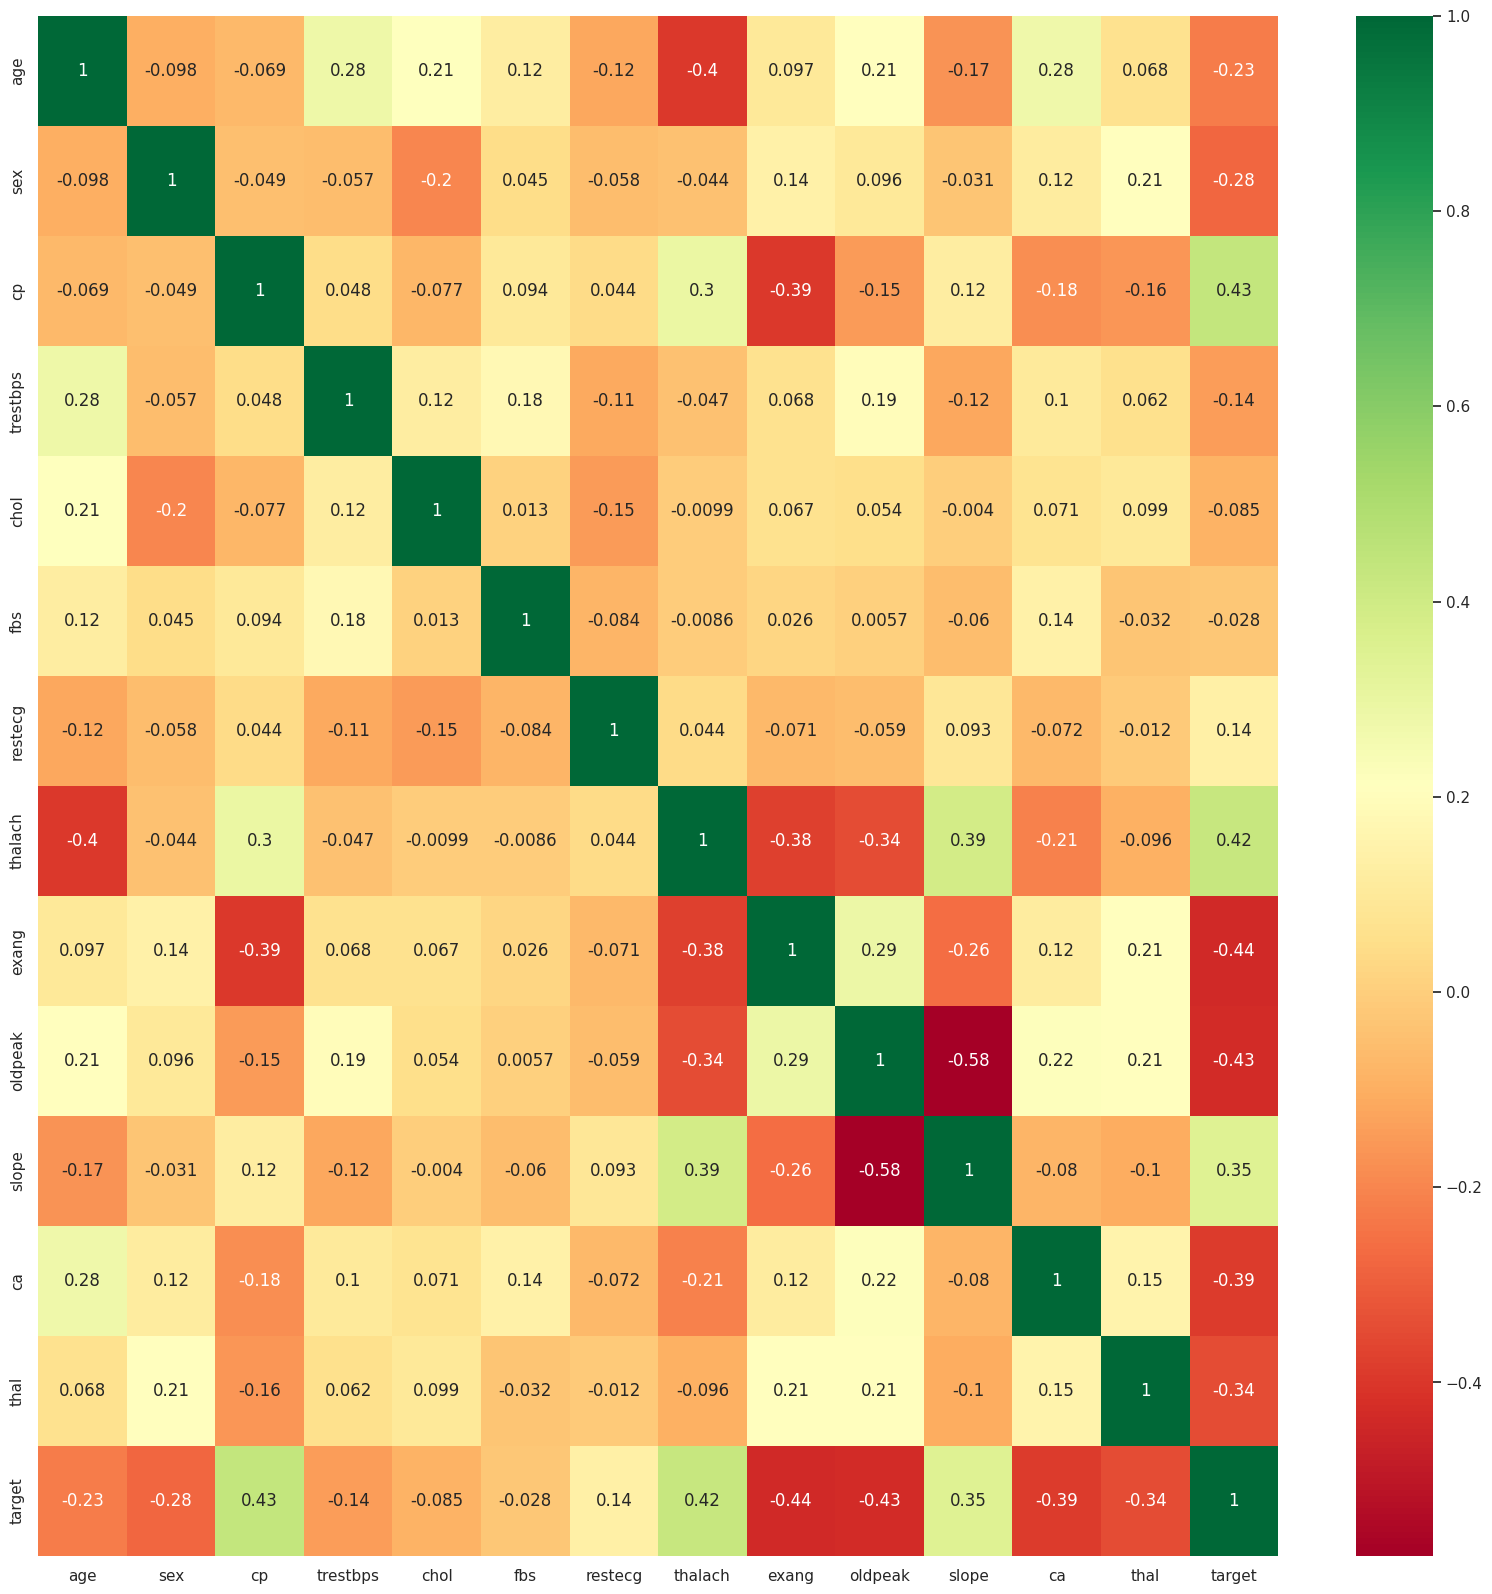

In [38]:
# Visualize correlation matrix
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

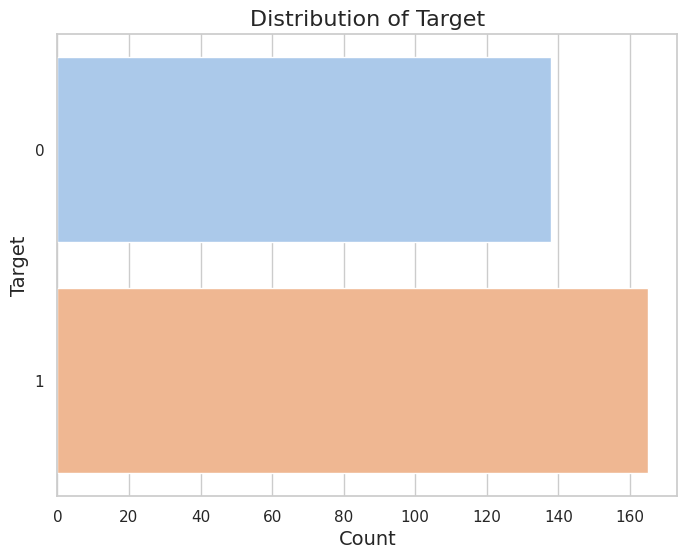

In [39]:
# Visualize target distribution
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(y="target", data=data, palette="pastel")
plt.xlabel("Count", fontsize=14)
plt.ylabel("Target", fontsize=14)
plt.title("Distribution of Target", fontsize=16)
plt.show()

In [40]:
# Percentage of target classes
target_counts = data["target"].value_counts()
print("Percentage of patients without heart problems:", round(target_counts[0] * 100 / len(data), 2))
print("Percentage of patients with heart problems:", round(target_counts[1] * 100 / len(data), 2))

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


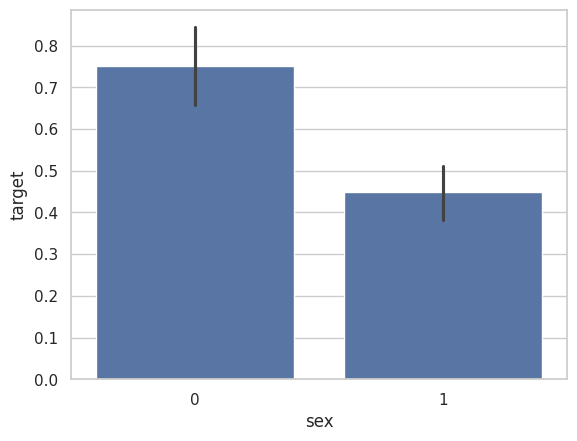

In [41]:
# Visualize sex vs target
sns.barplot(x="sex", y="target", data=data)
plt.show()

In [42]:
# Split dataset into predictors and target
X = data.drop("target", axis=1)
y = data["target"]

In [43]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [44]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(y_pred_lr, y_test) * 100, 2)
print("Accuracy score using Logistic Regression:", score_lr)

Accuracy score using Logistic Regression: 85.25


In [45]:
# Linear SVM
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
score_svm = round(accuracy_score(y_pred_svm, y_test) * 100, 2)
print("Accuracy score using Linear SVM:", score_svm)

Accuracy score using Linear SVM: 81.97


In [46]:
# Random Forest
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_x = x

In [47]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
print("Accuracy score using Random Forest:", score_rf)


Accuracy score using Random Forest: 90.16


In [48]:
# XGBoost
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
score_xgb = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
print("Accuracy score using XGBoost:", score_xgb)

Accuracy score using XGBoost: 83.61


In [49]:
from sklearn.neighbors import KNeighborsClassifier
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
score_knn = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
print("Accuracy score using K-Nearest Neighbors:", score_knn)

Accuracy score using K-Nearest Neighbors: 63.93


In [50]:
# Summary of accuracy scores
scores = [score_lr, score_svm, score_knn, score_rf, score_xgb]
algorithms = ["Logistic Regression", "Linear SVM", "K-Nearest Neighbors", "Random Forest", "XGBoost"]
for i in range(len(algorithms)):
    print("Accuracy score using", algorithms[i] + ":", scores[i])

Accuracy score using Logistic Regression: 85.25
Accuracy score using Linear SVM: 81.97
Accuracy score using K-Nearest Neighbors: 63.93
Accuracy score using Random Forest: 90.16
Accuracy score using XGBoost: 83.61


In [51]:
from sklearn.metrics import precision_score

# Calculate precision for Logistic Regression
precision_lr = precision_score(y_test, y_pred_lr)

# Calculate precision for Linear SVM
precision_svm = precision_score(y_test, y_pred_svm)

# Calculate precision for K-Nearest Neighbors
precision_knn = precision_score(y_test, y_pred_knn)

# Calculate precision for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)

# Calculate precision for XGBoost
precision_xgb = precision_score(y_test, y_pred_xgb)

# Print precision values for each model
print("Precision score using Logistic Regression:", precision_lr)
print("Precision score using Linear SVM:", precision_svm)
print("Precision score using K-Nearest Neighbors:", precision_knn)
print("Precision score using Random Forest:", precision_rf)
print("Precision score using XGBoost:", precision_xgb)


Precision score using Logistic Regression: 0.8571428571428571
Precision score using Linear SVM: 0.8108108108108109
Precision score using K-Nearest Neighbors: 0.6875
Precision score using Random Forest: 0.8888888888888888
Precision score using XGBoost: 0.8529411764705882


In [52]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

# Calculate Sensitivity (True Positive Rate)
def calculate_sensitivity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    return sensitivity

# Calculate Specificity (True Negative Rate)
def calculate_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity

# Calculate F1 Score
def calculate_f1_score(y_true, y_pred):
    f1 = classification_report(y_true, y_pred)
    return f1

# Calculate ROC-AUC Score
def calculate_roc_auc_score(y_true, y_pred):
    roc_auc = roc_auc_score(y_true, y_pred)
    return roc_auc

# Calculate and print metrics for each model
models = {
    "Logistic Regression": y_pred_lr,
    "Linear SVM": y_pred_svm,
    "K-Nearest Neighbors": y_pred_knn,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for name, y_pred in models.items():
    sensitivity = calculate_sensitivity(y_test, y_pred)
    specificity = calculate_specificity(y_test, y_pred)
    f1_score = calculate_f1_score(y_test, y_pred)
    roc_auc = calculate_roc_auc_score(y_test, y_pred)

    print(f"Metrics for {name}:")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")
    print(f"F1 Score: \n{f1_score}")
    print(f"ROC-AUC Score: {roc_auc}")
    print()


Metrics for Logistic Regression:
Sensitivity: 0.8823529411764706
Specificity: 0.8148148148148148
F1 Score: 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

ROC-AUC Score: 0.8485838779956427

Metrics for Linear SVM:
Sensitivity: 0.8823529411764706
Specificity: 0.7407407407407407
F1 Score: 
              precision    recall  f1-score   support

           0       0.83      0.74      0.78        27
           1       0.81      0.88      0.85        34

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61

ROC-AUC Score: 0.8115468409586056

Metrics for K-Nearest Neighbors:
Sensitivity: 0.6470588235294118
Spec

In [ ]:

# Collect input data from the user
age = float(input("Enter patient's age: "))
sex = float(input("Enter patient's sex (0 for female, 1 for male): "))
cp = float(input("Enter chest pain type (0-3): "))
trestbps = float(input("Enter resting blood pressure (mm Hg): "))
chol = float(input("Enter serum cholesterol (mg/dl): "))
fbs = float(input("Enter fasting blood sugar (> 120 mg/dl) (0 for No, 1 for Yes): "))
restecg = float(input("Enter resting electrocardiographic results (0-2): "))
thalach = float(input("Enter maximum heart rate achieved (bpm): "))
exang = float(input("Enter exercise induced angina (0 for No, 1 for Yes): "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = float(input("Enter the slope of the peak exercise ST segment (0-2): "))
ca = float(input("Enter number of major vessels (0-3) colored by flourosopy: "))
thal = float(input("Enter thalassemia type (0-3): "))

# Preprocess input data
input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
input_df = pd.DataFrame(input_data, columns=X.columns)

# Make predictions using each model
lr_prediction = lr.predict(input_df)[0]
svm_prediction = svm_model.predict(input_df)[0]
knn_prediction = knn.predict(input_df)[0]
rf_prediction = rf.predict(input_df)[0]
xgb_prediction = xgb_model.predict(input_df)[0]

# Output predictions
print("Prediction using Logistic Regression:", "Heart Disease Present" if lr_prediction == 1 else "Heart Disease Not Present")
print("Prediction using Linear SVM:", "Heart Disease Present" if svm_prediction == 1 else "Heart Disease Not Present")
print("Prediction using K-Nearest Neighbors:", "Heart Disease Present" if knn_prediction == 1 else "Heart Disease Not Present")
print("Prediction using Random Forest:", "Heart Disease Present" if rf_prediction == 1 else "Heart Disease Not Present")
print("Prediction using XGBoost:", "Heart Disease Present" if xgb_prediction == 1 else "Heart Disease Not Present")